# Wine Quality
A beginner ML Project to reinforce lessons from Géron's ML book
In this project, we will use ML to predict wine quality based on chemical characteristics

## Get the data
Since I am using a dataset off Kaggle, I have downloaded copy and will use local copy
instead of pulling data from a live source

In [1]:
import pandas as pd
wine = pd.read_csv("winequalityN.csv")

In [2]:
# inspect data
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

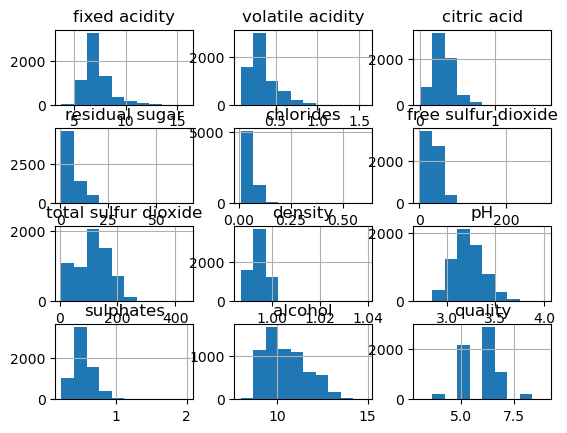

In [4]:
wine.hist()

## Create a Test Set and a Train Set
I do not want to make methods from scratch, will use SciKit Learn's built in methods
Quality is my target, so that will be my y set
Clean the data here by dropping type from data, since it is irrelevant to the model

In [5]:
# drop the non-numerical attribute, don't need it
wine.drop(['type'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
features = wine.drop(['quality'], axis=1)
target = wine['quality']
from sklearn.model_selection import train_test_split
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(features, target, test_size=0.2, random_state=256)
x_train_set.shape, x_test_set.shape

((5197, 12), (1300, 12))

In [7]:
y_train_set.shape

(5197,)

## Prepare the Data from Machine Learning Algorithms
1. Create the Pipline

In [8]:
# there are missing values, so we need an imputation strategy
# set up a pipeline
# also I found Géron's notebook to be overcomplicated with poor explanation as to why
# all the extra steps - so I consulted ChatGPT
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# for some reason type carries over to the train and test sets despite me dropping it from the data?
# I don't understand enough about Jupyter perhaps
x_train_set.drop(['type'], axis=1)
x_test_set.drop(['type'], axis=1)

# define pipeline steps
steps = [
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler()),
    ('logreg', LogisticRegression())
]

# create the pipeline
pipe = Pipeline(steps)
# fit the pipeline to the data
pipe.fit(x_train_set, y_train_set)
# use the pipeline to make predictions
y_pred = pipe.predict(x_test_set)

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'white'